<a href="https://colab.research.google.com/github/AkhmadRamadani/PCVK-2025-PUBLIC/blob/main/Kuis_1_Akhmad_Ramadani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama: Akhmad Ramadani
- NIM: 245107080002

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# file path
image_Soal1 = "/content/drive/MyDrive/PCVK/Kuis/Image/chelsea.jpeg"
image_A = "/content/drive/MyDrive/PCVK/Kuis/Image/A.jpg"
image_B = "/content/drive/MyDrive/PCVK/Kuis/Image/B.png"
image_KTM = "/content/drive/MyDrive/PCVK/Kuis/Image/KTM.jpg"

output_dir = "/content/drive/MyDrive/PCVK/Kuis/Output"

# KUIS

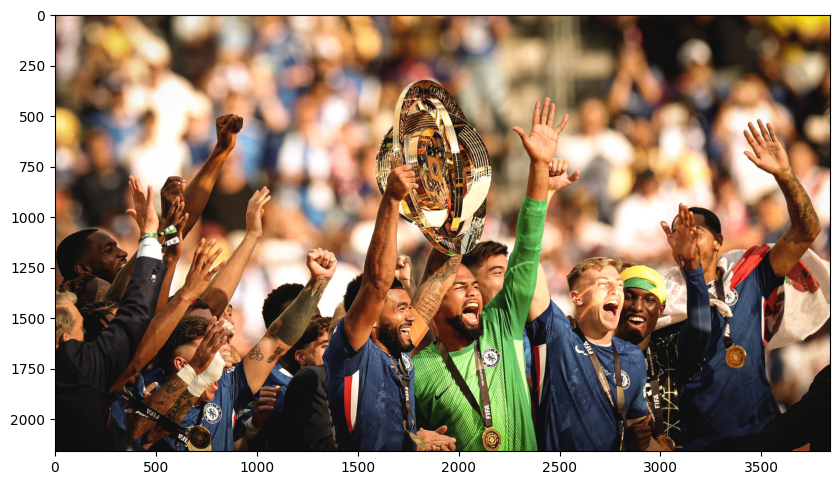

Image Dimensions: 3840 x 2160


In [15]:
image_1 = cv2.imread(image_Soal1)
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

# show images
plt.figure(figsize=(10, 10))
plt.imshow(image_1)
plt.show()

# show dimensions
print(f"Image Dimensions: {image_1.shape[1]} x {image_1.shape[0]}")

In [16]:
def resize_and_save(original_path, out_dir):
    os.makedirs(out_dir, exist_ok=True)

    img = cv2.imread(original_path)
    if img is None:
        raise FileNotFoundError(original_path)

    h, w = img.shape[:2]
    sizes = {
        "100%": (w, h),
        "50%": (int(w*0.5), int(h*0.5)),
        "25%": (int(w*0.25), int(h*0.25)),
    }

    results = []

    for label, (nw, nh) in sizes.items():
        resized = cv2.resize(img, (nw, nh), interpolation=cv2.INTER_AREA)
        base = os.path.join(out_dir, f"image_{label.replace('%','')}")

        path_jpeg = base + ".jpg"
        cv2.imwrite(path_jpeg, resized, [cv2.IMWRITE_JPEG_QUALITY, 100])

        path_png = base + ".png"
        cv2.imwrite(path_png, resized, [cv2.IMWRITE_PNG_COMPRESSION, 0])

        path_tiff = base + ".tiff"
        cv2.imwrite(path_tiff, resized)

        results.append({
            "label": label,
            "shape": resized.shape,
            "size_jpeg": os.path.getsize(path_jpeg),
            "size_png": os.path.getsize(path_png),
            "size_tiff": os.path.getsize(path_tiff),
        })

    return results

In [17]:
results = resize_and_save(image_Soal1, output_dir)
for r in results:
    print(f"{r['label']} {r['shape']} | "
          f"JPEG={r['size_jpeg']} B, PNG={r['size_png']} B, TIFF={r['size_tiff']} B")

100% (2160, 3840, 3) | JPEG=3287003 B, PNG=24925674 B, TIFF=11387162 B
50% (1080, 1920, 3) | JPEG=1397391 B, PNG=6231996 B, TIFF=3719726 B
25% (540, 960, 3) | JPEG=448402 B, PNG=1558306 B, TIFF=1118360 B


## Hasil Ukuran File (per Format & Resolusi)

| Resolusi | Dimensi (H, W, C) | JPEG     | PNG | TIFF  |
| -------- | ----------------- | --------------- | ---------------------- | ------------------- |
| **100%** | (2160, 3840, 3)   | **3,287,003 B** | 24,925,674 B           | 11,387,162 B        |
| **50%**  | (1080, 1920, 3)   | **1,397,391 B** | 6,231,996 B            | 3,719,726 B         |
| **25%**  | (540, 960, 3)     | **448,402 B**   | 1,558,306 B            | 1,118,360 B         |


**Pengamatan**
* Semakin rendah resolusi maka ukuran file semua format turun signifikan karena jumlah piksel yang lebih sedikit.
* **JPEG** selalu **paling kecil**.
* **PNG** lebih kecil dari TIFF, tapi masih jauh lebih besar dari JPEG.
* **TIFF** tanpa kompresi menjadi yang paling besar, karena menyimpan data mentah.

---

## Mengapa Terjadi Perbedaan Ukuran?

1. **Bit depth**
   Semua disimpan sebagai **8-bit per channel (24-bit RGB)**. Jadi faktor bit depth sama ukuran berbeda bukan karena ini, melainkan metode kompresi.

2. **Jenis kompresi**

   * **JPEG**: lossy compression (DCT + quantization). Informasi frekuensi tinggi dibuang sehingga membuat ukuran lebih kecil.
   * **PNG**: lossless compression (DEFLATE). Tidak ada informasi hilang, ukuran jauh lebih besar daripada JPEG.
   * **TIFF (OpenCV default)**: tanpa kompresi sama sekali, jadi ukurannya mendekati raw bitmap (`width × height × 3 byte`).

3. **Redundansi data**

   * Pada citra natural, banyak **spatial redundancy** (piksel yang redundan/berulang).
   * PNG bisa mengurangi redundansi, tapi masih lossless sehingga file lebih besar dari JPEG.
   * JPEG berani membuang detail (lossy) sehingga kompresinya jauh lebih efektif.
   * TIFF tanpa kompresi tidak mengurangi redundansi sama sekali.

---

## Format Terbaik untuk Real-Time YOLOv9?

Untuk aplikasi **deteksi objek real-time** seperti YOLOv9, pertimbangan utamanya adalah:

* **Kecepatan I/O** file kecil lebih cepat dibaca dari disk/network.
* **Decoding speed** JPEG decoding cepat (hardware accelerated).
* **Pengaruh pada akurasi**

  * JPEG (Q=80–90): artefak minimal, CNN (YOLO) tetap robust.
  * PNG/TIFF: kualitas maksimal, tapi ukuran besar bottleneck I/O.

**Kesimpulan**:

* **JPEG (Q=80–90)** adalah **paling efisien** untuk real-time YOLOv9 (trade-off terbaik antara ukuran, kecepatan, dan kualitas).
* **PNG/TIFF** lebih cocok untuk **training dataset** atau aplikasi di mana tidak boleh ada degradasi kualitas.



In [18]:
def linear_brightness(img, beta):
    res = cv2.convertScaleAbs(img, alpha=1.0, beta=beta)
    return res

def contrast_stretching(img, low_percent=1, high_percent=99):
    out = np.zeros_like(img)
    for c in range(3):
        channel = img[..., c]
        low = np.percentile(channel, low_percent)
        high = np.percentile(channel, high_percent)
        if high - low < 1:
            out[..., c] = channel
        else:
            out[..., c] = np.clip((channel - low) * 255.0 / (high - low), 0, 255).astype(np.uint8)
    return out

def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def plot_histograms(img, title='hist', savepath=None):
    plt.figure(figsize=(8,3))
    colors = ('r','g','b')
    for i,col in enumerate(colors):
        hist,bins = np.histogram(img[...,i].ravel(), bins=256, range=(0,255))
        plt.plot(hist, color=col)
    plt.title(title)
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.close()

Running Soal 2: brightness/contrast/gamma...


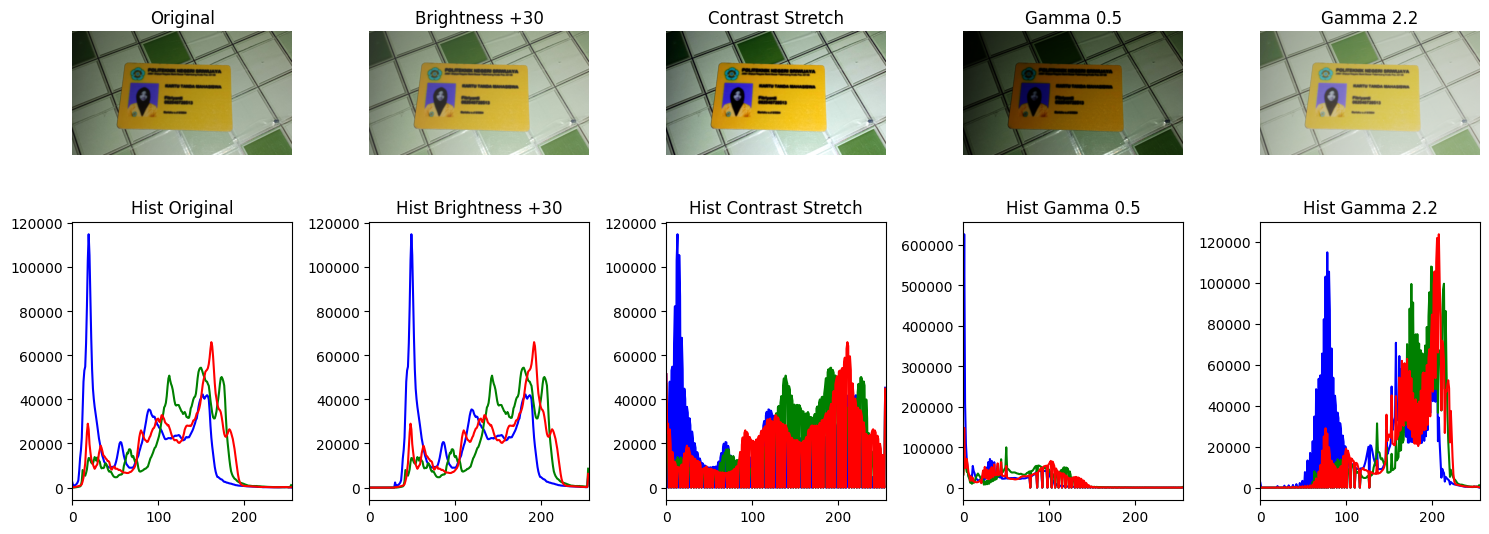

In [19]:
print("Running Soal 2: brightness/contrast/gamma...")
img_ktm = cv2.imread(image_KTM)
img_ktm = cv2.cvtColor(img_ktm, cv2.COLOR_BGR2RGB)
os.makedirs(os.path.join(output_dir, "soal2"), exist_ok=True)

bright = linear_brightness(img_ktm, beta=30)
stretched = contrast_stretching(img_ktm, 1, 99)
gamma05 = gamma_correction(img_ktm, 0.5)
gamma22 = gamma_correction(img_ktm, 2.2)

titles = ["Original", "Brightness +30", "Contrast Stretch", "Gamma 0.5", "Gamma 2.2"]
images = [img_ktm, bright, stretched, gamma05, gamma22]

plt.figure(figsize=(15,6))
for i, (title, im) in enumerate(zip(titles, images)):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

    # histogram
    plt.subplot(2, 5, i+6)
    for j, col in enumerate(('b','g','r')):
        hist = cv2.calcHist([im],[j],None,[256],[0,256])
        plt.plot(hist, color=col)
    plt.xlim([0,256])
    plt.title("Hist "+title)

plt.tight_layout()
plt.show()


## Perbandingan Transformasi pada Citra KTM (Soal 2)

| Transformasi                    | Efek Visual terhadap Teks                                                     | Pola Histogram                                                 | Efektivitas untuk Teks Buram                                  |
| ------------------------------- | ----------------------------------------------------------------------------- | -------------------------------------------------------------- | ------------------------------------------------------------- |
| **Original**                    | Teks agak terlihat tapi buram; kontras rendah akibat pencahayaan tidak merata | Distribusi sempit di intensitas menengah; puncak di area gelap | Baseline (kurang jelas)                                       |
| **Brightness +30**              | Gambar lebih terang, teks tidak jauh lebih terbaca                            | Histogram bergeser ke kanan, bentuk sama                       | **Kurang efektif** → tidak meningkatkan kontras relatif       |
| **Contrast Stretching (1–99%)** | Teks lebih jelas, huruf lebih menonjol dari latar                             | Histogram melebar ke 0–255; kontras global meningkat           | **Paling efektif** → foreground dan background terpisah jelas |
| **Gamma 0.5**                   | Gambar lebih cerah, huruf makin pudar di latar kuning                         | Distribusi terkonsentrasi ke kanan (nilai terang)              | Tidak efektif, teks hilang kontras                            |
| **Gamma 2.2**                   | Gambar lebih gelap, huruf sedikit lebih jelas, tapi detail lain hilang        | Distribusi condong ke kiri (nilai gelap)                       | Sebagian efektif, tapi merusak area gelap lainnya             |

---

## Kesimpulan

* **Contrast Stretching** adalah transformasi yang paling efektif meningkatkan keterbacaan teks buram.
* Alasannya jelas dari histogram: distribusi intensitas lebih lebar, perbedaan foreground dan background lebih besar  kontras teks meningkat.
* **Brightness** hanya menggeser tanpa memperbaiki kontras.
* **Gamma correction** hanya cocok untuk kasus pencahayaan ekstrem (terlalu gelap atau terlalu terang), tapi pada kasus KTM ini justru memperburuk keterbacaan.



In [20]:
from skimage.metrics import structural_similarity as ssim

In [21]:
img_a = cv2.imread(image_A)
img_b = cv2.imread(image_B)

In [22]:
img_a_rgb = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
img_b_rgb = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)

In [23]:
img_a_gray = cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY)
img_b_gray = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)

In [24]:
print(f"Ukuran Image A: {img_a.shape}")
print(f"Ukuran Image B: {img_b.shape}")

Ukuran Image A: (854, 1280, 3)
Ukuran Image B: (360, 640, 3)


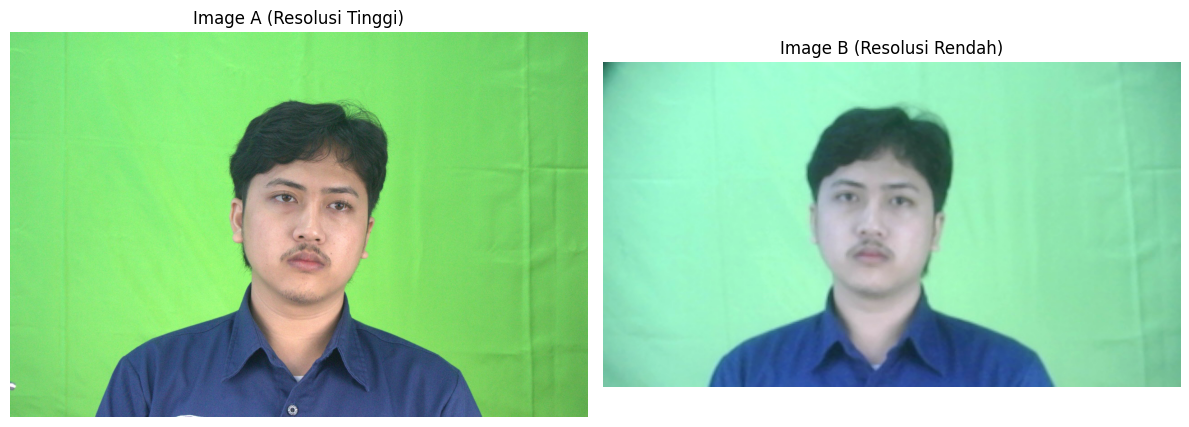

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_a_rgb)
plt.title('Image A (Resolusi Tinggi)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_b_rgb)
plt.title('Image B (Resolusi Rendah)')
plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
def calculate_histogram_stats(image_gray):
    """Menghitung statistik histogram"""
    mean = np.mean(image_gray)
    std = np.std(image_gray)
    return mean, std

def plot_histogram_comparison(img_a, img_b, title_a="Citra A", title_b="Citra B"):
    """Plot perbandingan histogram"""
    plt.figure(figsize=(15, 5))

    # Histogram Citra A
    plt.subplot(1, 3, 1)
    plt.hist(img_a.ravel(), bins=256, range=[0, 256], alpha=0.7, color='blue')
    plt.title(f'Histogram {title_a}')
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Frekuensi')

    # Histogram Citra B
    plt.subplot(1, 3, 2)
    plt.hist(img_b.ravel(), bins=256, range=[0, 256], alpha=0.7, color='red')
    plt.title(f'Histogram {title_b}')
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Frekuensi')

    # Perbandingan overlay
    plt.subplot(1, 3, 3)
    plt.hist(img_a.ravel(), bins=256, range=[0, 256], alpha=0.5, color='blue', label=title_a)
    plt.hist(img_b.ravel(), bins=256, range=[0, 256], alpha=0.5, color='red', label=title_b)
    plt.title('Perbandingan Histogram')
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Frekuensi')
    plt.legend()

    plt.tight_layout()
    plt.show()


=== ANALISIS HISTOGRAM IMAGE ASLI ===
Image A - Mean: 162.79, Std Dev: 44.67
Image B - Mean: 182.06, Std Dev: 47.22


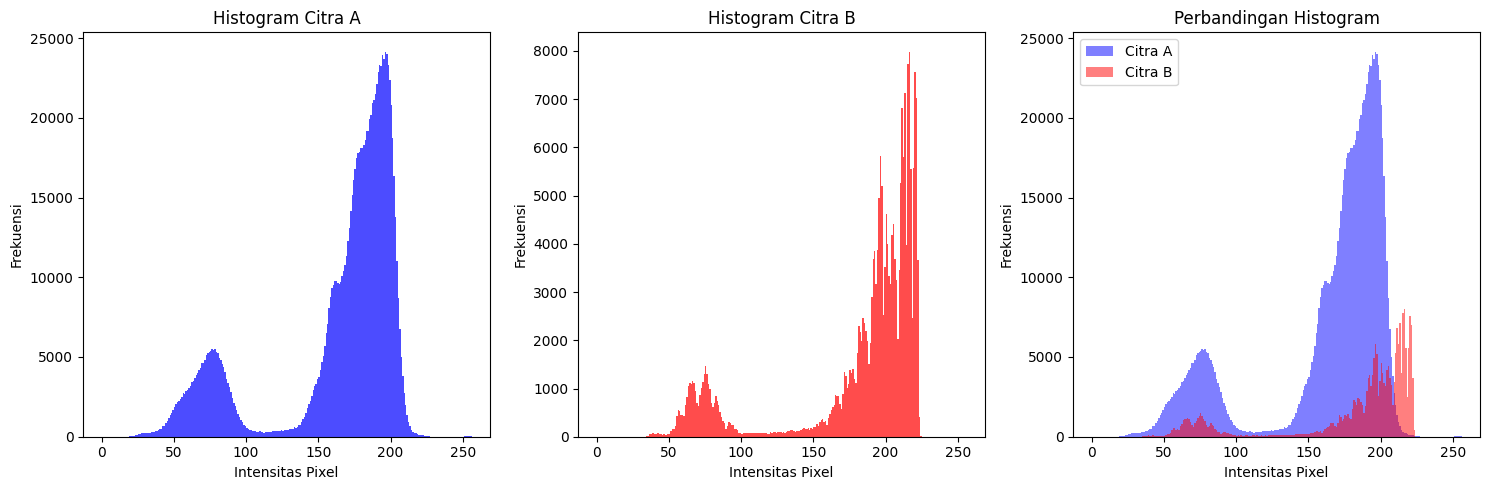

In [27]:
print("=== ANALISIS HISTOGRAM IMAGE ASLI ===")
mean_a, std_a = calculate_histogram_stats(img_a_gray)
mean_b, std_b = calculate_histogram_stats(img_b_gray)

print(f"Image A - Mean: {mean_a:.2f}, Std Dev: {std_a:.2f}")
print(f"Image B - Mean: {mean_b:.2f}, Std Dev: {std_b:.2f}")

plot_histogram_comparison(img_a_gray, img_b_gray)

### Interpretasi Histogram:

**Perbedaan Distribusi Intensitas:**
- Citra dengan resolusi tinggi umumnya memiliki distribusi intensitas yang lebih halus dan detail
- Citra dengan resolusi rendah mungkin menunjukkan kehilangan detail dan kontras yang berbeda
- Standar deviasi yang lebih tinggi menunjukkan kontras yang lebih baik

**Pengaruh terhadap Kualitas Visual:**
- Distribusi yang lebih luas (std dev tinggi) = kontras lebih baik
- Distribusi yang sempit = citra terlihat datar/kurang kontras

In [28]:
def contrast_stretching(image):
    """Menerapkan Contrast Stretching"""
    # Normalisasi ke rentang 0-255
    min_val = np.min(image)
    max_val = np.max(image)

    if max_val == min_val:
        return image

    stretched = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return stretched

def apply_clahe(image, clip_limit=3.0, tile_grid_size=(8,8)):
    """Menerapkan CLAHE (Contrast Limited Adaptive Histogram Equalization)"""
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(image)

=== PENINGKATAN KUALITAS CITRA B ===


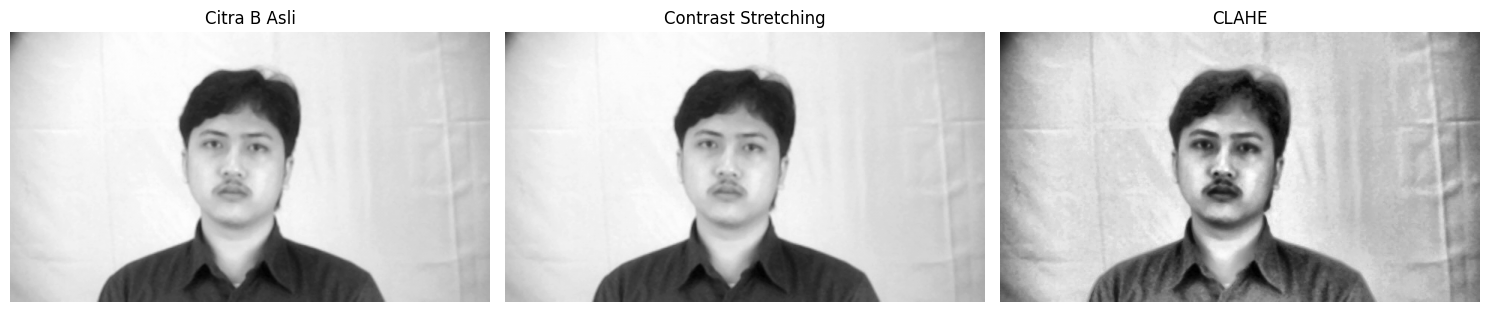

In [29]:
print("=== PENINGKATAN KUALITAS CITRA B ===")

# Contrast Stretching
img_b_stretched = contrast_stretching(img_b_gray)

# CLAHE
img_b_clahe = apply_clahe(img_b_gray)

# Tampilkan hasil enhancement
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_b_gray, cmap='gray')
plt.title('Citra B Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_b_stretched, cmap='gray')
plt.title('Contrast Stretching')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_b_clahe, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.tight_layout()
plt.show()


In [30]:
mean_orig, std_orig = calculate_histogram_stats(img_b_gray)
mean_stretched, std_stretched = calculate_histogram_stats(img_b_stretched)
mean_clahe, std_clahe = calculate_histogram_stats(img_b_clahe)

print(f"Image B Asli - Mean: {mean_orig:.2f}, Std Dev: {std_orig:.2f}")
print(f"Contrast Stretching - Mean: {mean_stretched:.2f}, Std Dev: {std_stretched:.2f}")
print(f"CLAHE - Mean: {mean_clahe:.2f}, Std Dev: {std_clahe:.2f}")

Image B Asli - Mean: 182.06, Std Dev: 47.22
Contrast Stretching - Mean: 198.86, Std Dev: 62.75
CLAHE - Mean: 175.44, Std Dev: 50.13


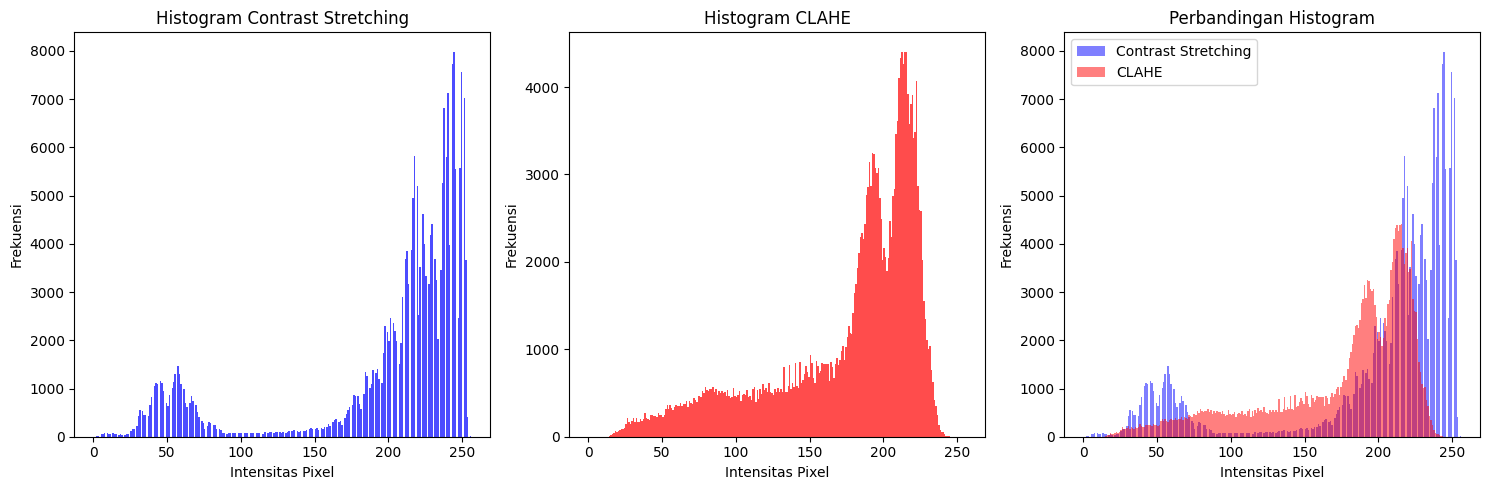

In [31]:
plot_histogram_comparison(img_b_stretched, img_b_clahe, "Contrast Stretching", "CLAHE")

### Analisis Enhancement:

**Contrast Stretching:**
- Memperluas rentang intensitas ke seluruh spektrum 0-255
- Meningkatkan kontras global secara linear
- Efektif untuk citra dengan kontras rendah

**CLAHE (Contrast Limited Adaptive Histogram Equalization):**
- Meningkatkan kontras lokal dengan membatasi amplifikasi noise
- Mencegah over-enhancement pada area yang sudah memiliki kontras tinggi
- Lebih efektif untuk citra dengan variasi pencahayaan

In [32]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """Menambahkan Gaussian noise ke citra"""
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

def calculate_mse(image1, image2):
    """Menghitung Mean Squared Error"""
    mse = np.mean((image1.astype(np.float64) - image2.astype(np.float64)) ** 2)
    return mse

def calculate_psnr(image1, image2):
    """Menghitung Peak Signal-to-Noise Ratio"""
    mse = calculate_mse(image1, image2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_ssim(image1, image2):
    """Menghitung Structural Similarity Index"""
    return ssim(image1, image2, data_range=255)

=== DENOISING DAN EVALUASI KUALITAS ===


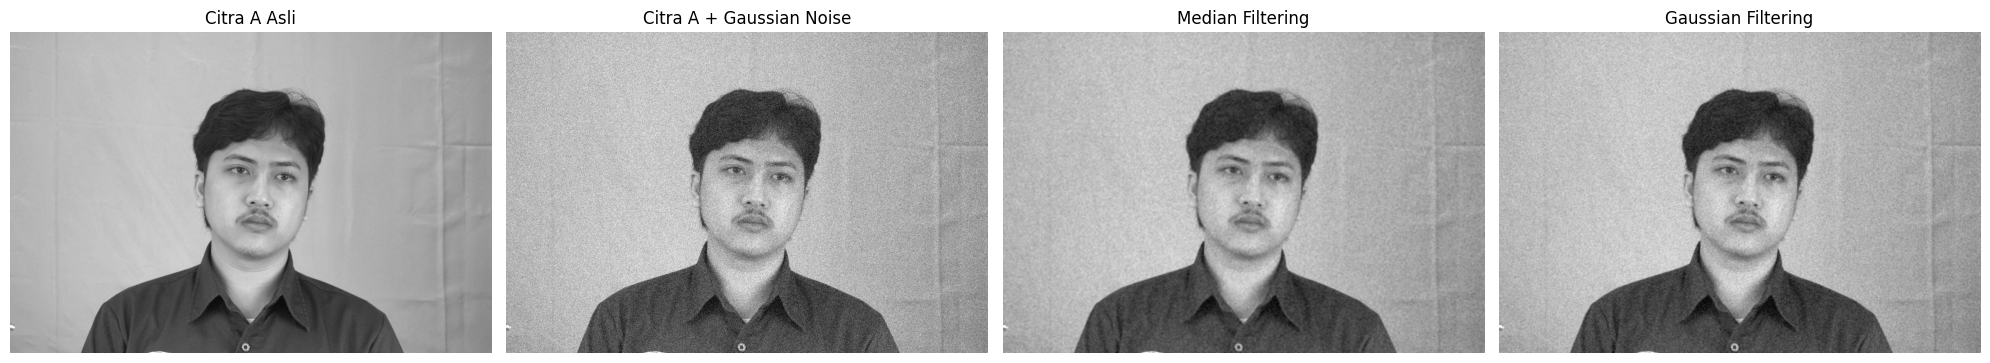

In [33]:
print("=== DENOISING DAN EVALUASI KUALITAS ===")
noisy_img_a = add_gaussian_noise(img_a_gray)

# Terapkan filtering
# Median Filter
median_filtered = cv2.medianBlur(noisy_img_a, 5)

# Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(noisy_img_a, (5, 5), 1.0)

# Tampilkan hasil denoising
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_a_gray, cmap='gray')
plt.title('Citra A Asli')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noisy_img_a, cmap='gray')
plt.title('Citra A + Gaussian Noise')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtering')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtering')
plt.axis('off')

plt.tight_layout()
plt.show()

In [34]:
print("\n=== EVALUASI KUALITAS DENOISING ===")

# MSE
mse_median = calculate_mse(img_a_gray, median_filtered)
mse_gaussian = calculate_mse(img_a_gray, gaussian_filtered)

print(f"MSE Median Filter: {mse_median:.2f}")
print(f"MSE Gaussian Filter: {mse_gaussian:.2f}")

# PSNR
psnr_median = calculate_psnr(img_a_gray, median_filtered)
psnr_gaussian = calculate_psnr(img_a_gray, gaussian_filtered)

print(f"PSNR Median Filter: {psnr_median:.2f} dB")
print(f"PSNR Gaussian Filter: {psnr_gaussian:.2f} dB")

# SSIM
ssim_median = calculate_ssim(img_a_gray, median_filtered)
ssim_gaussian = calculate_ssim(img_a_gray, gaussian_filtered)

print(f"SSIM Median Filter: {ssim_median:.4f}")
print(f"SSIM Gaussian Filter: {ssim_gaussian:.4f}")

# Perbandingan metrik
metrics_comparison = {
    'Filter': ['Median', 'Gaussian'],
    'MSE': [mse_median, mse_gaussian],
    'PSNR (dB)': [psnr_median, psnr_gaussian],
    'SSIM': [ssim_median, ssim_gaussian]
}


=== EVALUASI KUALITAS DENOISING ===
MSE Median Filter: 55.93
MSE Gaussian Filter: 63.71
PSNR Median Filter: 30.65 dB
PSNR Gaussian Filter: 30.09 dB
SSIM Median Filter: 0.6285
SSIM Gaussian Filter: 0.5877


In [35]:
import pandas as pd


=== TABEL PERBANDINGAN METRIK ===
  Filter       MSE  PSNR (dB)    SSIM
  Median 55.930914  30.654284 0.62847
Gaussian 63.710448  30.088697 0.58771


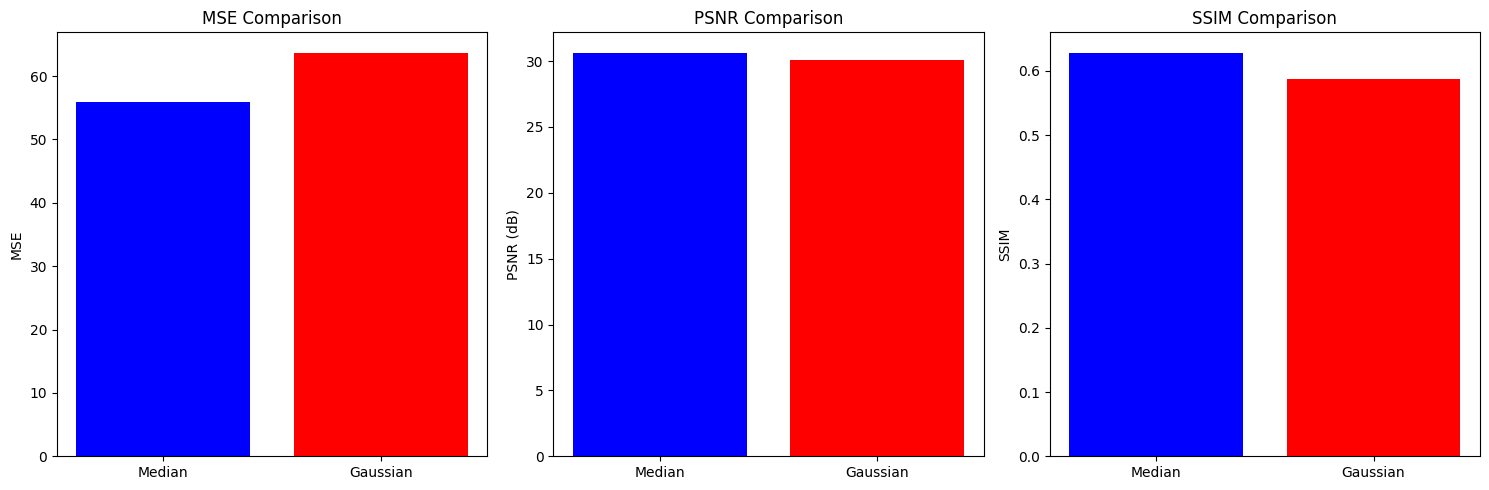

In [36]:
df_metrics = pd.DataFrame(metrics_comparison)
print("\n=== TABEL PERBANDINGAN METRIK ===")
print(df_metrics.to_string(index=False))

# Visualisasi metrik
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(['Median', 'Gaussian'], [mse_median, mse_gaussian], color=['blue', 'red'])
plt.title('MSE Comparison')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(['Median', 'Gaussian'], [psnr_median, psnr_gaussian], color=['blue', 'red'])
plt.title('PSNR Comparison')
plt.ylabel('PSNR (dB)')

plt.subplot(1, 3, 3)
plt.bar(['Median', 'Gaussian'], [ssim_median, ssim_gaussian], color=['blue', 'red'])
plt.title('SSIM Comparison')
plt.ylabel('SSIM')

plt.tight_layout()
plt.show()

 ## Kesimpulan dan Analisis

 ### 1. Analisis Histogram:
 - **Distribusi Intensitas**: Perbedaan resolusi mempengaruhi distribusi histogram
 - **Kualitas Visual**: Standar deviasi yang lebih tinggi menunjukkan kontras yang lebih baik

 ### 2. Enhancement Methods:
 - **Contrast Stretching**: Efektif untuk meningkatkan kontras global
 - **CLAHE**: Lebih baik untuk enhancement lokal dan mencegah over-amplifikasi
 - **Rekomendasi**: CLAHE umumnya lebih efektif karena adaptif terhadap kondisi lokal

 ### 3. Denoising Evaluation:
 - **Median Filter**: Lebih efektif untuk menghilangkan salt-and-pepper noise
 - **Gaussian Filter**: Lebih baik untuk mengurangi Gaussian noise dengan smoothing
 - **Metrik Evaluasi**:
   - MSE: Semakin rendah semakin baik
   - PSNR: Semakin tinggi semakin baik (>30 dB = good quality)
   - SSIM: Semakin mendekati 1 semakin baik

 ### Filter yang Lebih Efektif:
 Berdasarkan metrik evaluasi, filter yang memberikan nilai PSNR tertinggi dan SSIM mendekati 1 dengan MSE terendah adalah yang paling efektif untuk kondisi noise Gaussian.

In [37]:
print("=== ANALISIS PARAMETER OPTIMAL ===")

# Test berbagai parameter untuk Gaussian Filter
sigmas = [0.5, 1.0, 1.5, 2.0]
kernel_sizes = [3, 5, 7, 9]

best_psnr = 0
best_params = {}

print("Testing Gaussian Filter parameters:")
for sigma in sigmas:
    for ksize in kernel_sizes:
        if ksize % 2 == 1:  # Kernel size harus ganjil
            filtered = cv2.GaussianBlur(noisy_img_a, (ksize, ksize), sigma)
            psnr = calculate_psnr(img_a_gray, filtered)
            print(f"Kernel: {ksize}x{ksize}, Sigma: {sigma} -> PSNR: {psnr:.2f} dB")

            if psnr > best_psnr:
                best_psnr = psnr
                best_params = {'kernel_size': ksize, 'sigma': sigma}

print(f"\nParameter optimal: Kernel {best_params['kernel_size']}x{best_params['kernel_size']}, Sigma {best_params['sigma']}")
print(f"PSNR terbaik: {best_psnr:.2f} dB")

=== ANALISIS PARAMETER OPTIMAL ===
Testing Gaussian Filter parameters:
Kernel: 3x3, Sigma: 0.5 -> PSNR: 23.98 dB
Kernel: 5x5, Sigma: 0.5 -> PSNR: 23.98 dB
Kernel: 7x7, Sigma: 0.5 -> PSNR: 23.98 dB
Kernel: 9x9, Sigma: 0.5 -> PSNR: 23.98 dB
Kernel: 3x3, Sigma: 1.0 -> PSNR: 28.64 dB
Kernel: 5x5, Sigma: 1.0 -> PSNR: 30.09 dB
Kernel: 7x7, Sigma: 1.0 -> PSNR: 30.23 dB
Kernel: 9x9, Sigma: 1.0 -> PSNR: 30.23 dB
Kernel: 3x3, Sigma: 1.5 -> PSNR: 28.94 dB
Kernel: 5x5, Sigma: 1.5 -> PSNR: 31.47 dB
Kernel: 7x7, Sigma: 1.5 -> PSNR: 32.10 dB
Kernel: 9x9, Sigma: 1.5 -> PSNR: 32.22 dB
Kernel: 3x3, Sigma: 2.0 -> PSNR: 28.96 dB
Kernel: 5x5, Sigma: 2.0 -> PSNR: 31.73 dB
Kernel: 7x7, Sigma: 2.0 -> PSNR: 32.66 dB
Kernel: 9x9, Sigma: 2.0 -> PSNR: 32.90 dB

Parameter optimal: Kernel 9x9, Sigma 2.0
PSNR terbaik: 32.90 dB


# TUGAS KUIS

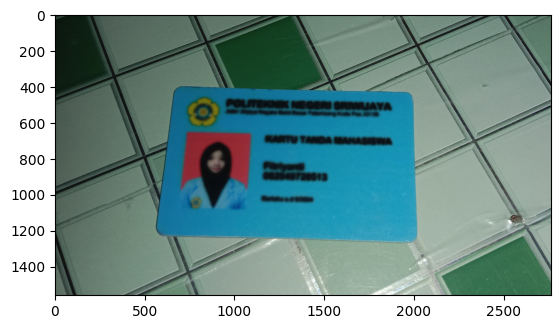

In [38]:
img_ktm_baru = cv2.imread(image_KTM)
img_ktm_baru_rgb = cv2.cvtColor(img_ktm_baru, cv2.COLOR_BGR2RGB)
plt.imshow(img_ktm_baru_rgb)

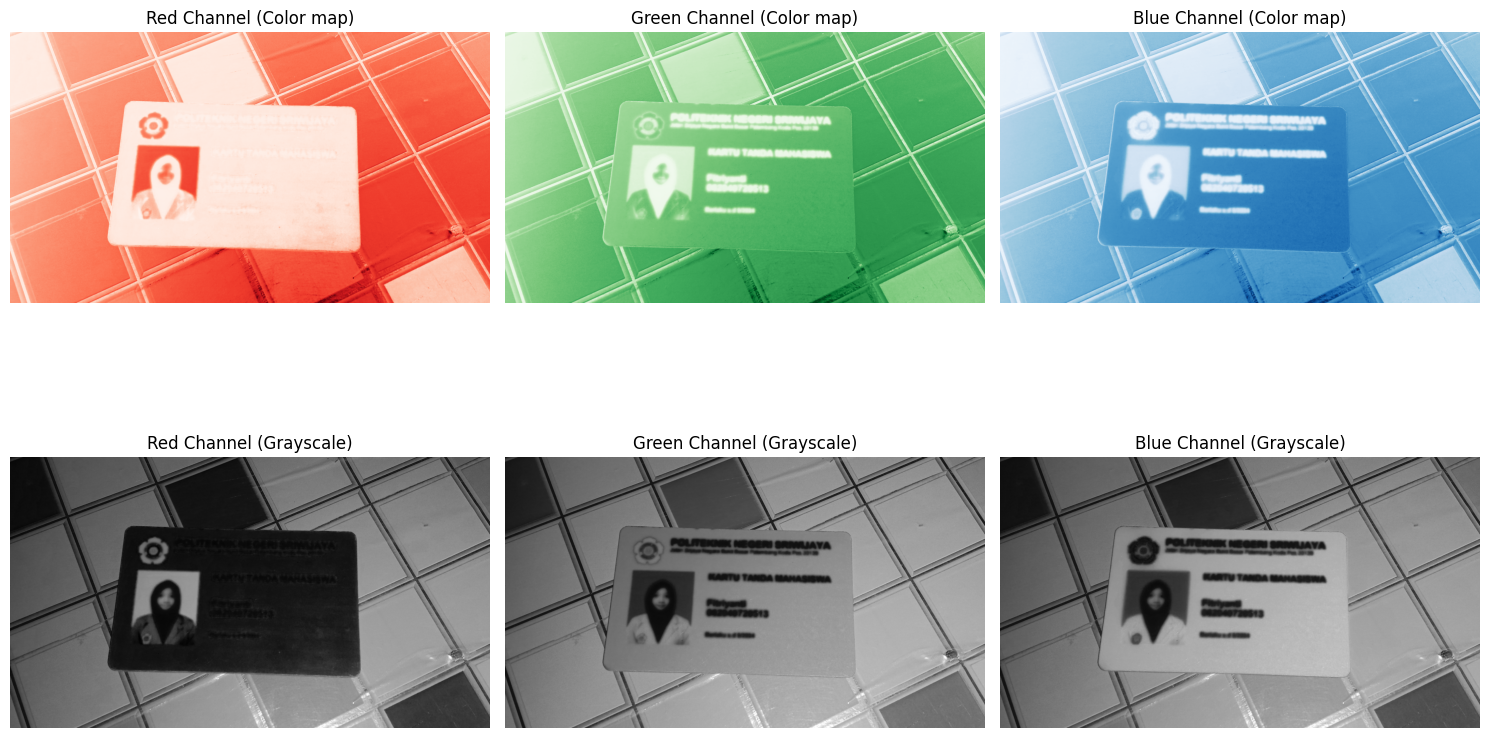

In [39]:
b, g, r = cv2.split(img_ktm_baru)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel (Color map)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel (Color map)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel (Color map)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(r, cmap='gray')
plt.title('Red Channel (Grayscale)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(g, cmap='gray')
plt.title('Green Channel (Grayscale)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel (Grayscale)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [40]:
def sobel_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    gradient_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return gradient_normalized

def canny_edge_detection(image, threshold1, threshold2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    edges = cv2.Canny(blurred, threshold1, threshold2)

    return edges

def laplacian_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Laplacian(gray, cv2.CV_64F)

    edges = cv2.convertScaleAbs(edges)

    return edges

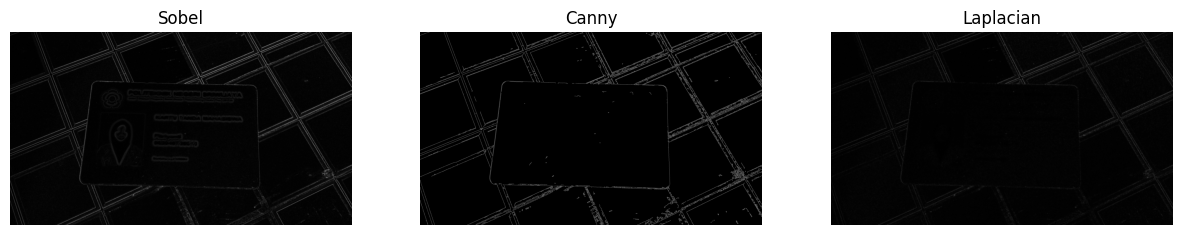

In [41]:
img_ktm_baru_sobel = sobel_edge_detection(img_ktm_baru)

threshold1 = 30
threshold2 = 100
img_ktm_baru_canny = canny_edge_detection(img_ktm_baru, threshold1, threshold2)

img_ktm_baru_laplace = laplacian_edge_detection(img_ktm_baru)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_ktm_baru_sobel, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_ktm_baru_canny, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_ktm_baru_laplace, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.show()


In [42]:
def apply_morphology(image, operation='erode', kernel_size=(5,5), iterations=1):
    """
    Apply morphological operation to an image and show result.

    Parameters:
        image (ndarray): Input grayscale/binary image.
        operation (str): 'erode', 'dilate', 'open', 'close', 'gradient', 'tophat', 'blackhat'.
        kernel_size (tuple): Size of structuring element.
        iterations (int): Number of times operation applied.
    """
    # pastikan grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # buat kernel
    kernel = np.ones(kernel_size, np.uint8)

    # pilih operasi
    if operation == 'erode':
        result = cv2.erode(gray, kernel, iterations=iterations)
    elif operation == 'dilate':
        result = cv2.dilate(gray, kernel, iterations=iterations)
    elif operation == 'open':
        result = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=iterations)
    elif operation == 'close':
        result = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    elif operation == 'gradient':
        result = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations=iterations)
    elif operation == 'tophat':
        result = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel, iterations=iterations)
    elif operation == 'blackhat':
        result = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel, iterations=iterations)
    else:
        raise ValueError("operation must be one of: 'erode', 'dilate', 'open', 'close', 'gradient', 'tophat', 'blackhat'")

    # tampilkan hasil
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(result, cmap='gray')
    plt.title(f"{operation.capitalize()} (k={kernel_size}, it={iterations})")
    plt.axis('off')
    plt.show()

    return result


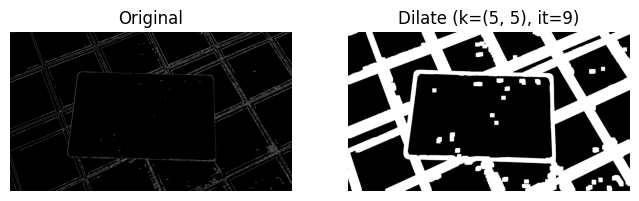

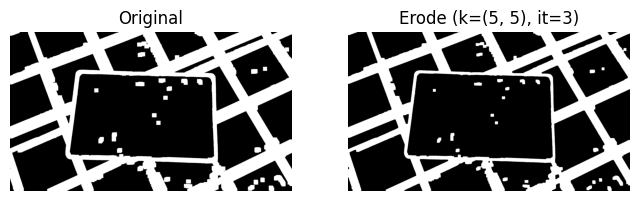

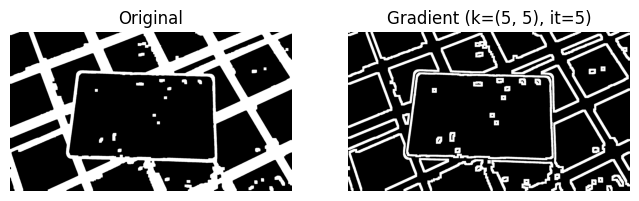

In [43]:
dilated_img_ktm_baru_canny = apply_morphology(img_ktm_baru_canny, operation='dilate', kernel_size=(5,5), iterations=9)
erode_dilated_img_ktm_baru_canny = apply_morphology(dilated_img_ktm_baru_canny, operation='erode', kernel_size=(5,5), iterations=3)
erode_dilated_img_ktm_baru_canny_2 = apply_morphology(erode_dilated_img_ktm_baru_canny, operation='gradient', kernel_size=(5,5), iterations=5)


In [44]:
def crop_card_from_edges(original_img, edge_img):
    """
    Detect and crop card from original image using edge detection results.

    Args:
        original_img: Original BGR image
        edge_img: Binary edge detection result

    Returns:
        cropped_card: Cropped card image
        bbox: Bounding box coordinates (x, y, w, h)
    """
    # Find contours in the edge image
    contours, _ = cv2.findContours(edge_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contours found!")
        return None, None

    # Find the largest contour (assumed to be the card)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the original image
    cropped_card = original_img[y:y+h, x:x+w]

    return cropped_card, (x, y, w, h)


def crop_card_with_perspective(original_img, edge_img):
    """
    Detect card corners and apply perspective transform for better cropping.
    This works better if the card is rotated.

    Args:
        original_img: Original BGR image
        edge_img: Binary edge detection result

    Returns:
        warped_card: Perspective-corrected card image
        corners: Four corner points of the card
    """
    # Find contours
    contours, _ = cv2.findContours(edge_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contours found!")
        return None, None

    # Find largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Approximate contour to polygon
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)

    # If we have 4 corners, apply perspective transform
    if len(approx) == 4:
        corners = approx.reshape(4, 2)

        # Order corners: top-left, top-right, bottom-right, bottom-left
        rect = order_points(corners)

        # Calculate destination dimensions
        (tl, tr, br, bl) = rect
        widthA = np.linalg.norm(br - bl)
        widthB = np.linalg.norm(tr - tl)
        maxWidth = max(int(widthA), int(widthB))

        heightA = np.linalg.norm(tr - br)
        heightB = np.linalg.norm(tl - bl)
        maxHeight = max(int(heightA), int(heightB))

        # Destination points
        dst = np.array([
            [0, 0],
            [maxWidth - 1, 0],
            [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]
        ], dtype="float32")

        # Perspective transform
        M = cv2.getPerspectiveTransform(rect, dst)
        warped = cv2.warpPerspective(original_img, M, (maxWidth, maxHeight))

        return warped, corners
    else:
        # Fallback to bounding rectangle
        x, y, w, h = cv2.boundingRect(largest_contour)
        cropped = original_img[y:y+h, x:x+w]
        return cropped, None


def order_points(pts):
    """Order points in clockwise order starting from top-left."""
    rect = np.zeros((4, 2), dtype="float32")

    # Top-left will have smallest sum, bottom-right largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # Top-right will have smallest diff, bottom-left largest diff
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect


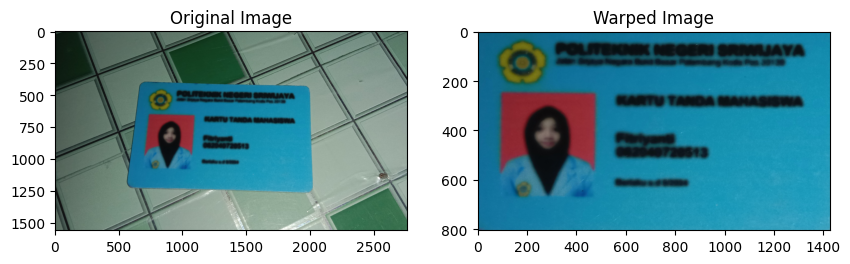

Card extracted with perspective correction


In [45]:
warped, corners = crop_card_with_perspective(img_ktm_baru, erode_dilated_img_ktm_baru_canny_2)
if warped is not None:
    cv2.imwrite('cropped_card_perspective.jpg', warped)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv2.cvtColor(img_ktm_baru, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[1].imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Warped Image')
    plt.show()

    print("Card extracted with perspective correction")
else:
    print("Card extraction failed")

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def enhance_text_readability(img):
    """
    Apply various techniques to enhance text readability on ID cards.

    Args:
        img: Input BGR image

    Returns:
        Dictionary of processed images with different techniques
    """
    results = {}

    # 1. Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    results['grayscale'] = gray

    # 2. Increase contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(gray)
    results['clahe'] = clahe_img

    # 3. Sharpen the image
    kernel_sharpen = np.array([[-1,-1,-1],
                               [-1, 9,-1],
                               [-1,-1,-1]])
    sharpened = cv2.filter2D(gray, -1, kernel_sharpen)
    results['sharpened'] = sharpened

    # 4. Adaptive thresholding (great for varying lighting)
    adaptive_thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )
    results['adaptive_threshold'] = adaptive_thresh

    # 5. Otsu's thresholding (automatic threshold)
    _, otsu_thresh = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    results['otsu_threshold'] = otsu_thresh

    # 6. Morphological operations to clean up text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    morph = cv2.morphologyEx(otsu_thresh, cv2.MORPH_CLOSE, kernel)
    results['morphological'] = morph

    # 7. Denoise + Sharpen combination
    denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    denoised_sharp = cv2.filter2D(denoised, -1, kernel_sharpen)
    results['denoise_sharpen'] = denoised_sharp

    # 8. CLAHE + Adaptive Threshold (often the best combination)
    clahe_adaptive = cv2.adaptiveThreshold(
        clahe_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )
    results['clahe_adaptive'] = clahe_adaptive

    # 9. Bilateral filter (preserves edges while smoothing)
    bilateral = cv2.bilateralFilter(gray, 9, 75, 75)
    bilateral_sharp = cv2.filter2D(bilateral, -1, kernel_sharpen)
    results['bilateral_sharp'] = bilateral_sharp

    return results


def enhance_colored_text(img):
    """
    Special enhancement for colored text on colored backgrounds.
    Works well for your blue card with black text.

    Args:
        img: Input BGR image

    Returns:
        Enhanced image
    """
    # Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l_clahe = clahe.apply(l)

    # Merge back
    lab_clahe = cv2.merge([l_clahe, a, b])
    enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

    # Convert to grayscale and threshold
    gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresh


def upscale_for_ocr(img, scale_factor=2):
    """
    Upscale image for better OCR results.

    Args:
        img: Input image
        scale_factor: Scaling factor (2-4 recommended)

    Returns:
        Upscaled image
    """
    height, width = img.shape[:2]
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)

    # Use INTER_CUBIC for upscaling
    upscaled = cv2.resize(img, (new_width, new_height),
                          interpolation=cv2.INTER_CUBIC)

    return upscaled


def preprocess_for_ocr(img, method='best'):
    """
    Recommended preprocessing pipeline for OCR on ID cards.

    Args:
        img: Input BGR image
        method: 'best', 'fast', or 'aggressive'

    Returns:
        Preprocessed image ready for OCR
    """
    if method == 'best':
        # Upscale first
        upscaled = upscale_for_ocr(img, scale_factor=2)

        # Convert to grayscale
        gray = cv2.cvtColor(upscaled, cv2.COLOR_BGR2GRAY)

        # Denoise
        denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        clahe_img = clahe.apply(denoised)

        # Adaptive threshold
        result = cv2.adaptiveThreshold(
            clahe_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 15, 3
        )

    elif method == 'fast':
        # Quick preprocessing
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        result = clahe.apply(gray)

    elif method == 'aggressive':
        # Maximum contrast
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        clahe_img = clahe.apply(gray)
        _, result = cv2.threshold(clahe_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return result

In [47]:
warped_copy = warped.copy()

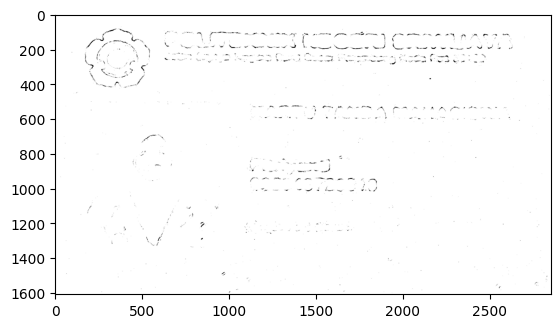

In [48]:
best_result = preprocess_for_ocr(warped_copy, method='best')
plt.imshow(best_result, cmap='gray')

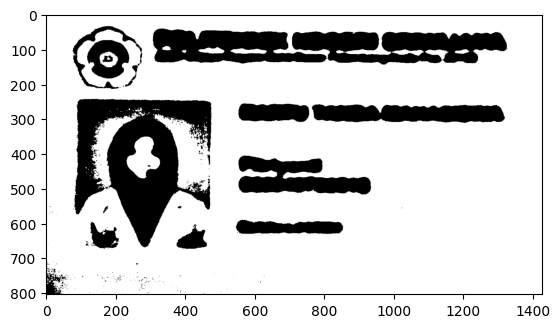

In [49]:
colored_enhanced = enhance_colored_text(warped_copy)
plt.imshow(colored_enhanced, cmap='gray')

In [50]:
results = enhance_text_readability(warped_copy)

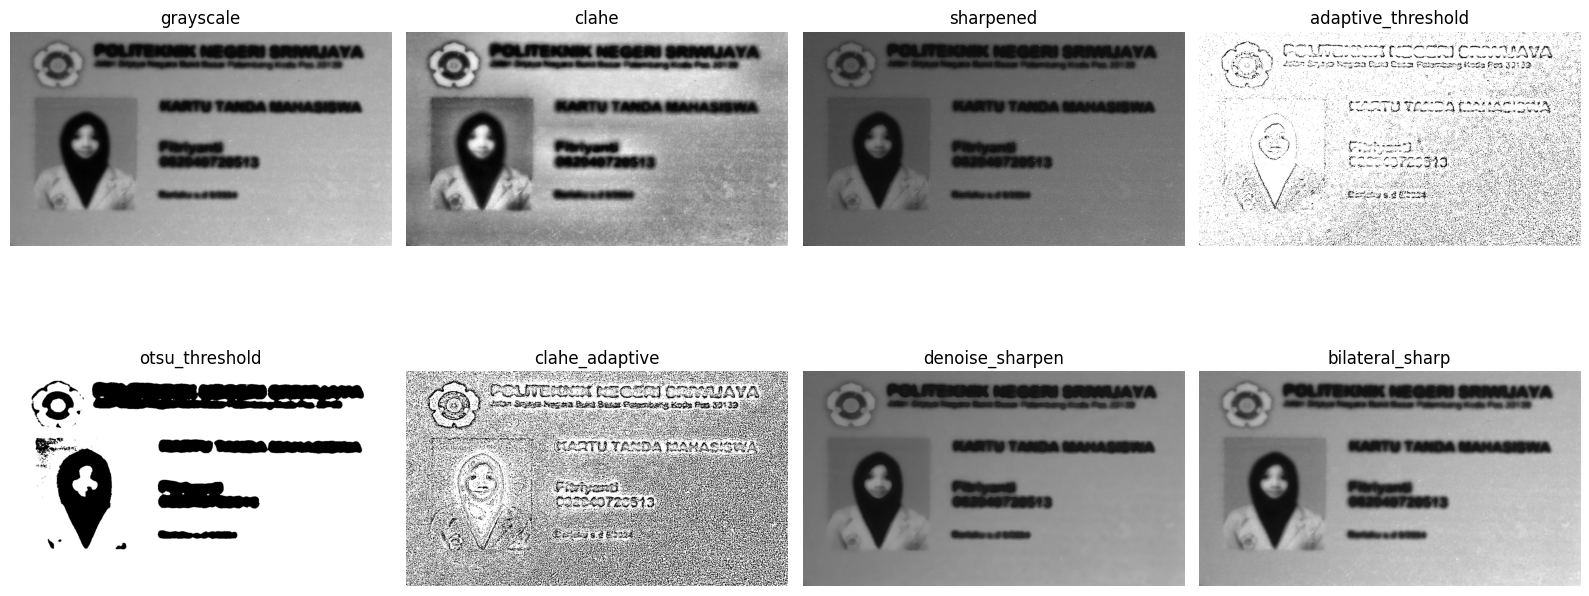

In [51]:
# Display comparison (optional)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

display_imgs = ['grayscale', 'clahe', 'sharpened', 'adaptive_threshold',
                'otsu_threshold', 'clahe_adaptive', 'denoise_sharpen', 'bilateral_sharp']

for idx, name in enumerate(display_imgs):
    axes[idx].imshow(results[name], cmap='gray')
    axes[idx].set_title(name)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## SR

In [52]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 759 (delta 106), reused 98 (delta 98), pack-reused 638 (from 1)
Receiving objects: 100% (759/759), 5.38 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (415/415), done.
/content/Real-ESRGAN/Real-ESRGAN
/usr/local/lib/python3.12/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.12/dist-packages/setuptools/command/develop.py:41: EasyInstallDep

In [53]:
import sys
import torchvision.transforms.functional as F

# Add the missing module
sys.modules['torchvision.transforms.functional_tensor'] = F

# Now import should work
from basicsr.archs.rrdbnet_arch import RRDBNet
from realesrgan import RealESRGANer

In [54]:
def create_upsampler(model_name='RealESRGAN_x4plus', scale=4, tile=0, tile_pad=10, half=True):
    """
    Create a Real-ESRGAN upsampler instance.

    Args:
        model_name: 'RealESRGAN_x4plus' for photos or 'RealESRGAN_x4plus_anime_6B' for anime
        scale: Upscaling factor (4)
        tile: Tile size (0=no tiling, 400-800 for large images to avoid OOM)
        tile_pad: Padding for tiles
        half: Use FP16 for faster GPU inference

    Returns:
        RealESRGANer instance
    """
    # Model paths
    model_path = f'experiments/pretrained_models/{model_name}.pth'

    # Choose architecture based on model
    if 'anime' in model_name:
        model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=6, num_grow_ch=32, scale=4)
    else:
        model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)

    # Create upsampler
    upsampler = RealESRGANer(
        scale=scale,
        model_path=model_path,
        model=model,
        tile=tile,
        tile_pad=tile_pad,
        pre_pad=0,
        half=half,
        gpu_id=0  # Use first GPU
    )

    return upsampler

# Step 5: Upscale image function
def upscale_image(img, upsampler, outscale=4):
    """
    Upscale a cv2 image.

    Args:
        img: Input image (numpy array in BGR format from cv2)
        upsampler: RealESRGANer instance
        outscale: Output scaling factor

    Returns:
        Upscaled image (numpy array in BGR format)
    """
    output, _ = upsampler.enhance(img, outscale=outscale)
    return output

# Step 6: Process image file function
def upscale_image_file(input_path, output_path, upsampler, outscale=4):
    """
    Load, upscale and save an image file.

    Args:
        input_path: Path to input image
        output_path: Path to save output
        upsampler: RealESRGANer instance
        outscale: Output scaling factor

    Returns:
        Tuple of (original_image, upscaled_image)
    """
    # Read with cv2
    img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

    if img is None:
        raise ValueError(f"Cannot read image: {input_path}")

    print(f"Input image size: {img.shape}")

    # Upscale
    output = upscale_image(img, upsampler, outscale=outscale)

    print(f"Output image size: {output.shape}")

    # Save
    cv2.imwrite(output_path, output)
    print(f"Saved to: {output_path}")

    return img, output


In [55]:
upsampler = create_upsampler(model_name='RealESRGAN_x4plus', tile=0)


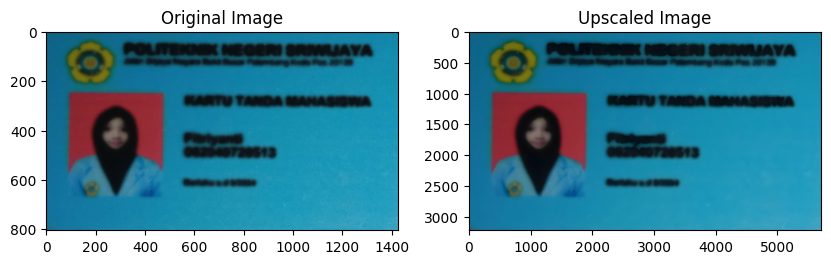

In [56]:
upscaled = upscale_image(warped, upsampler, outscale=4)
# show warped alongside with upscaled using plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(upscaled, cv2.COLOR_BGR2RGB))
axs[1].set_title('Upscaled Image')
plt.show()

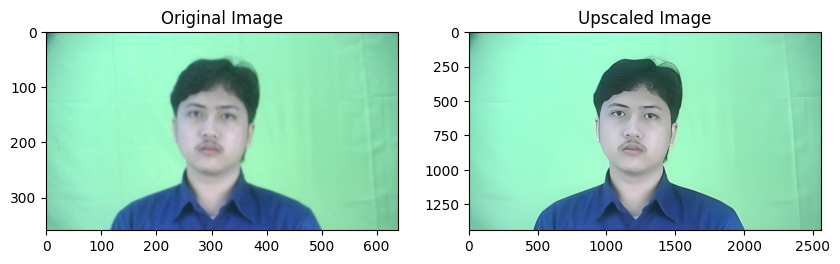

In [57]:
upscaled_img_b = upscale_image(img_b, upsampler, outscale=4)
# show warped alongside with upscaled using plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(upscaled_img_b, cv2.COLOR_BGR2RGB))
axs[1].set_title('Upscaled Image')
plt.show()